In [22]:

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

### Plot for Trump

In [23]:
from config import SUBREDDIT_NAME
START_DATE = datetime(2024, 1, 1)

In [24]:
print(SUBREDDIT_NAME)

healthcare


In [25]:
df = pd.read_parquet(f"posts_output/{SUBREDDIT_NAME}/Trump/watermark_data")
#df = df[df['timestamp'] > START_DATE]
df.shape

(11, 11)

/var/folders/5y/nm55z3vs3q72_gcmp1j45hmr0000gn/T/ipykernel_65546/2709840931.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(


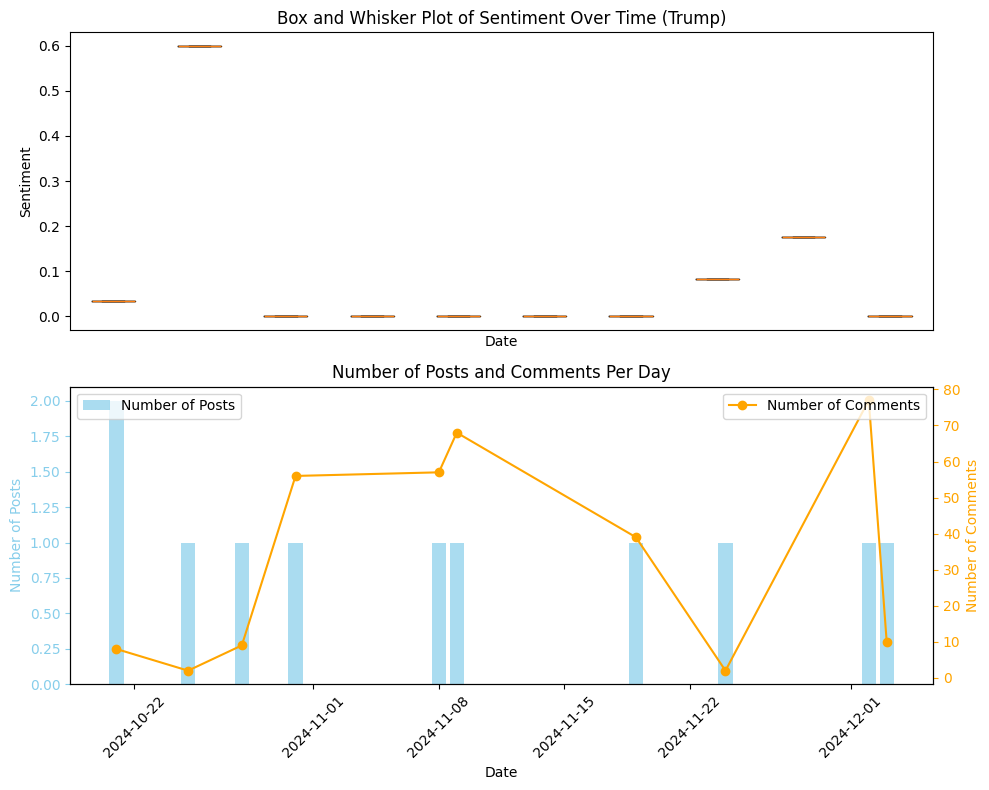

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the aggregated Parquet data
df = pd.read_parquet(f"posts_output/{SUBREDDIT_NAME}/Trump/watermark_data")

# Ensure the timestamp is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df[df['timestamp'] > START_DATE]
# Extract the date from the timestamp for grouping
df['date'] = df['timestamp'].dt.date

# Group data by date
date_group = df.groupby('date')

# Sort the dates in ascending order
sorted_dates = sorted(df['date'].unique())

# Create the box plot grouped by date
plt.figure(figsize=(10, 8))

# Create a subplot grid (2 rows, 1 column)
ax1 = plt.subplot(2, 1, 1)  # Top subplot for the box plot
ax2 = plt.subplot(2, 1, 2)  # Bottom subplot for the bar plot

# Top subplot: Box plot
ax1.boxplot(
    [df[df['date'] == date]['sentiment'] for date in sorted_dates],
    labels=[str(date) for date in sorted_dates],
    vert=True,
    showfliers=False,
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment')
ax1.set_title('Box and Whisker Plot of Sentiment Over Time (Trump)')
ax1.tick_params(axis='x', rotation=45)
ax1.set_xticks([])  # Hide x-ticks

# Bottom subplot: Bar plot of post counts and number of comments
post_counts = date_group.size()  # Count the number of posts per date
comment_counts = date_group['num_comments'].sum()  # Sum of comments per date

# Plot number of posts
ax2.bar(post_counts.index, post_counts.values, color='skyblue', alpha=0.7, label='Number of Posts')

# Create a secondary y-axis for the number of comments
ax2_comments = ax2.twinx()
ax2_comments.plot(comment_counts.index, comment_counts.values, color='orange', label='Number of Comments', marker='o')

ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Posts', color='skyblue')
ax2.tick_params(axis='y', colors='skyblue')
ax2.set_title('Number of Posts and Comments Per Day')
ax2.tick_params(axis='x', rotation=45)

ax2_comments.set_ylabel('Number of Comments', color='orange')
ax2_comments.tick_params(axis='y', colors='orange')

# Add legends
ax2.legend(loc='upper left')
ax2_comments.legend(loc='upper right')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


In [27]:
df.month_key.unique()

array(['2024-10', '2024-12', '2024-11'], dtype=object)

### Plot for Harris

/var/folders/5y/nm55z3vs3q72_gcmp1j45hmr0000gn/T/ipykernel_65546/3931610275.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(


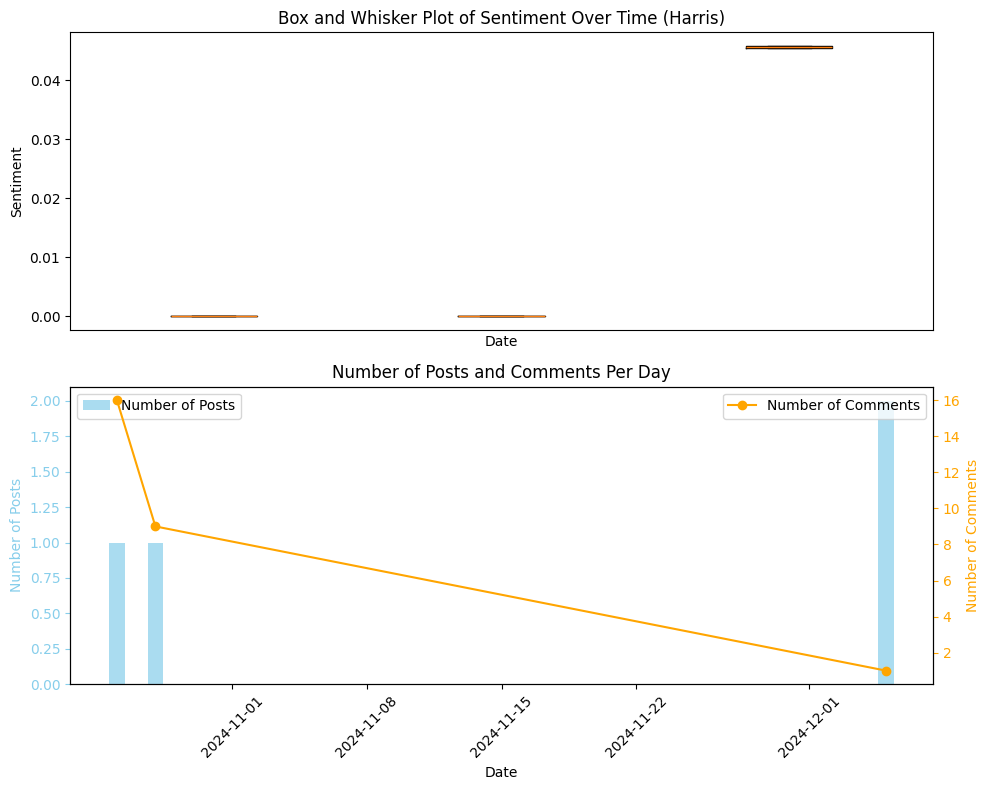

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the aggregated Parquet data
df = pd.read_parquet(f"posts_output/{SUBREDDIT_NAME}/Harris/watermark_data")

# Ensure the timestamp is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract the date from the timestamp for grouping
df['date'] = df['timestamp'].dt.date
df = df[df['timestamp'] > START_DATE]

# Group data by date
date_group = df.groupby('date')

# Sort the dates in ascending order
sorted_dates = sorted(df['date'].unique())

# Create the box plot grouped by date
plt.figure(figsize=(10, 8))

# Create a subplot grid (2 rows, 1 column)
ax1 = plt.subplot(2, 1, 1)  # Top subplot for the box plot
ax2 = plt.subplot(2, 1, 2)  # Bottom subplot for the bar plot

# Top subplot: Box plot
ax1.boxplot(
    [df[df['date'] == date]['sentiment'] for date in sorted_dates],
    labels=[str(date) for date in sorted_dates],
    vert=True,
    showfliers=False,
)
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment')
ax1.set_title('Box and Whisker Plot of Sentiment Over Time (Harris)')
ax1.tick_params(axis='x', rotation=45)
ax1.set_xticks([])  # Hide x-ticks

# Bottom subplot: Bar plot of post counts and number of comments
post_counts = date_group.size()  # Count the number of posts per date
comment_counts = date_group['num_comments'].sum()  # Sum of comments per date

# Plot number of posts
ax2.bar(post_counts.index, post_counts.values, color='skyblue', alpha=0.7, label='Number of Posts')

# Create a secondary y-axis for the number of comments
ax2_comments = ax2.twinx()
ax2_comments.plot(comment_counts.index, comment_counts.values, color='orange', label='Number of Comments', marker='o')

ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Posts', color='skyblue')
ax2.tick_params(axis='y', colors='skyblue')
ax2.set_title('Number of Posts and Comments Per Day')
ax2.tick_params(axis='x', rotation=45)

ax2_comments.set_ylabel('Number of Comments', color='orange')
ax2_comments.tick_params(axis='y', colors='orange')

# Add legends
ax2.legend(loc='upper left')
ax2_comments.legend(loc='upper right')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()
